In [314]:
import numpy as np
import sympy as smp
from sympy import symbols, Eq, solve
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tabulate import tabulate
import matplotlib

from uncertainties import ufloat
from uncertainties.umath import *
from uncertainties import unumpy
import uncertainties as unc

In [329]:
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [29]:
def linear(x,a,b):
    return a*x + b

# Ukol 1

In [330]:
Vzlt = 0.53 ###pm 0.1, 578nm
Vzel = 0.62 ##pm 0.1, 546nm
Vmod = 0.99 ##pm 0.1, 436nm
Vfia = 1.06 ##pm 0.1, 405nm
VUV = 1.18 ##pm 0.1, 365nm

In [331]:
Vzlt2 = 0.21 ###pm 0.1
Vzel2 = 0.30 ##pm 0.1 
Vmod2 = 0.44 ##pm 0.1
Vfia2 = 0.48 ##pm 0.1
VUV2 = 0.71 ##pm 0.1

In [332]:
e = 1.602176634*10**(-19)

In [333]:
lamb = np.array([578,546,436,405,365])*10**(-9)
U1 = np.array([0.53,0.62,0.99,1.06,1.18])*2
U2 = np.array([0.21,0.3,0.44,0.48,0.71])*2
E1 = e*U1
E2 = e*U2
sE = e*0.15
c = 299792458
f = c/lamb

In [334]:
f/10**12

array([518.67207266, 549.0704359 , 687.59738073, 740.22829136,
       821.3492    ])

In [335]:
tab = np.array([lamb*10**9,f/10**12, U1,U2]).round(2).T

print(tabulate(tab, tablefmt="latex_booktabs"))

\begin{tabular}{rrrr}
\toprule
 578 & 518.67 & 1.06 & 0.42 \\
 546 & 549.07 & 1.24 & 0.6  \\
 436 & 687.6  & 1.98 & 0.88 \\
 405 & 740.23 & 2.12 & 0.96 \\
 365 & 821.35 & 2.36 & 1.42 \\
\bottomrule
\end{tabular}


## Clona 1

In [336]:
params,err = curve_fit(linear, f, E1, sigma=np.full(len(f),sE),absolute_sigma=True)

a1,b1 = params
sa1,sb1 = np.sqrt(np.diag(err))
print(a1,b1)
print(sa1,sb1)

7.0622108532689844e-34 -1.8779405220369541e-19
9.393670409236849e-35 6.323610242221364e-20


In [337]:
ua1 = ufloat(a1,sa1)
ub1 = ufloat(b1,sb1)

print('{:L}'.format(-ub1/ua1))

\left(2.7 \pm 1.0\right) \times 10^{14}


In [338]:
print('{:L}'.format(ua1))
print('{:L}'.format(ub1))

\left(7.1 \pm 0.9\right) \times 10^{-34}
\left(-1.9 \pm 0.6\right) \times 10^{-19}


In [339]:
x_range = np.linspace(270,850,100)

plt.figure(figsize = (8,5))

plt.errorbar(f/10**12,E1*10**19, yerr=np.full(len(f/10**12),sE*10**19),elinewidth=.4, fmt = 'kx', linestyle = None, ecolor = "k",capsize=3, label = "Naměřená energie pro clonu 1")
#plt.scatter(phi2,U3,color = 'k',marker = 'x', label = "Namerena intenzita")
plt.plot(x_range,(a1*x_range*10**12 + b1)*10**19, lw = .9, color = 'k', linestyle = 'dashed', label = r"$E = \left(7.1 \pm 0.9\right) \times 10^{-34} \cdot f - \left(1.9 \pm 0.6\right) \times 10^{-20}$")


plt.errorbar(f/10**12,E2*10**19, yerr=np.full(len(f/10**12),sE*10**19),elinewidth=.4, fmt = 'k+', linestyle = None, ecolor = "k",capsize=3, label = "Naměřená energie pro clonu 2")
#plt.scatter(phi2,U3,color = 'k',marker = 'x', label = "Namerena intenzita")
plt.plot(x_range,(a2*x_range*10**12 + b2)*10**19, lw = .8, color = 'k', label = r"$E = \left(4.7 \pm 0.9\right) \times 10^{-34} \cdot f - \left(1.7 \pm 0.6\right) \times 10^{-20}$")

plt.legend(loc='upper left', fontsize=10)



plt.xticks(np.arange(249,850,10), minor = True)
plt.yticks(np.arange(0,4,.1), minor = True)
plt.ylim(0,4.2)

plt.ylabel("$E$ " + r"[$\times 10^{-19}$ J]", fontsize=12)
plt.xlabel(r"$ f $ " + "[THz]", fontsize=12)

plt.savefig('Energy.pdf', bbox_inches = 'tight')
plt.show()

C:\Users\stepa\AppData\Local\Temp/ipykernel_5444/3907019398.py:26: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


## Clona 2

In [289]:
params,err = curve_fit(linear, f, E2, sigma=np.full(len(f),sE),absolute_sigma=True)

a2,b2 = params
sa2,sb2 = np.sqrt(np.diag(err))
print(a2,b2)
print(sa2,sb2)

4.651425953817296e-34 -1.714215919545312e-19
9.393670447566398e-35 6.323610241716134e-20


In [290]:
ua2 = ufloat(a2,sa2)
ub2 = ufloat(b2,sb2)

print('{:L}'.format(-ub2/ua2))

\left(3.7 \pm 1.5\right) \times 10^{14}


In [291]:
print('{:L}'.format(ua2))
print('{:L}'.format(ub2))

\left(4.7 \pm 0.9\right) \times 10^{-34}
\left(-1.7 \pm 0.6\right) \times 10^{-19}


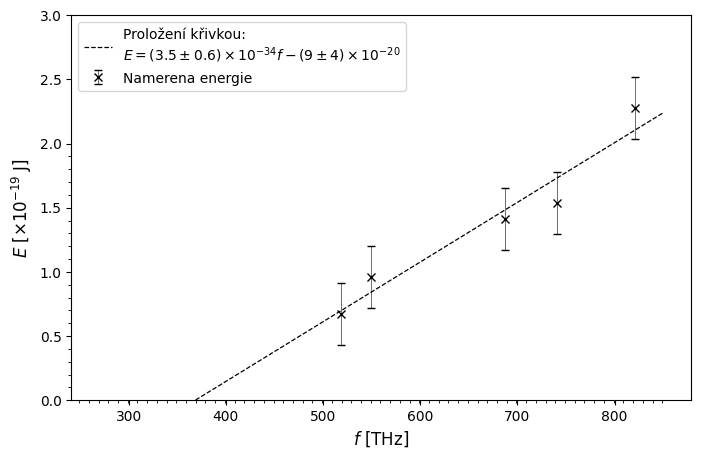

In [271]:
x_range = np.linspace(270,850,100)

plt.figure(figsize = (8,5))

plt.errorbar(f/10**12,E2*10**19, yerr=np.full(len(f/10**12),sE*10**19),elinewidth=.4, fmt = 'kx', linestyle = None, ecolor = "k",capsize=3, label = "Namerena energie")
#plt.scatter(phi2,U3,color = 'k',marker = 'x', label = "Namerena intenzita")
plt.plot(x_range,(a2*x_range*10**12 + b2)*10**19, lw = .9, color = 'k', linestyle = 'dashed', label = "Proložení křivkou: \n" + r"$E = \left(3.5 \pm 0.6\right) \times 10^{-34}f - \left(9 \pm 4\right) \times 10^{-20}$")

plt.legend(loc='upper left', fontsize=10)



plt.xticks(np.arange(249,850,10), minor = True)
plt.yticks(np.arange(0,2,.1), minor = True)
plt.ylim(0,3)

plt.ylabel("$E$ " + r"[$\times 10^{-19}$ J]", fontsize=12)
plt.xlabel(r"$ f $ " + "[THz]", fontsize=12)

plt.savefig('Energy2.pdf', bbox_inches = 'tight')
plt.show()

## Planck

In [286]:
print('{:L}'.format(np.mean(np.array([ua1,ua2]))))

\left(5.9 \pm 0.7\right) \times 10^{-34}


In [287]:
print('{:L}'.format(np.mean(np.array([-ub1/ua1,-ub2/ua2]))))

\left(3.2 \pm 0.9\right) \times 10^{14}


In [288]:
h = np.mean([ua1,ua2])
print('{:L}'.format(h))

\left(5.9 \pm 0.7\right) \times 10^{-34}


# Ukol 2

In [340]:
def quadr(x,a,b,c):
    return a*x**2 + b*x + c

In [341]:
#U2 = np.arange(0,30,.3)
U2 = np.arange(0,24,.3)
Ia = np.array([-0.03,-0.012,0,0.01,0.017,0.015,0.005,-0.014,-0.042,-0.054,-0.064,-0.068,-0.073,-0.045,-0.01,0.006,0.041,0.065,0.071,0.056,0.021,-0.055,-0.125,-0.266,-0.363,-0.342,-0.188,-0.075,0.069,0.165,0.181,0.237,0.257,0.217,0.187,0.121, 0.046, -0.137,-0.357,-0.535,-0.647,-0.843,-0.713,-0.497,-0.215, 0.117,0.135,0.312,0.375,0.406,0.371,0.325,0.166,-0.09,-0.295,-0.675,-0.928,-1.045,-1.315,-1.075,-0.558,-0.135,0.327,0.555,0.698,0.748,0.721,0.667,0.537,0.258,-0.033,-0.268,-0.739,-1.015,-1.225,-1.155,-0.875,-0.407,0.011,0.355])  #### 2000 mV

In [342]:
ind = np.array([[14,21],[22,27],[28,36],[38,44],[46,53],[54,61],[62,69],[71,78]])

In [343]:
A = []
B = []
C = []
sA = []
sB = []
sC = []

for i in ind:
    params,err = curve_fit(quadr, U2[i[0]:i[1]+1],Ia[i[0]:i[1]+1])
    a,b,c = params
    sa,sb,sc = np.sqrt(np.diag(err))
    A.append(a)
    B.append(b)
    C.append(c)
    sA.append(sa)
    sB.append(sb)
    sC.append(sc)
    
for a,b,c in zip(A,B,C):
    print(a,b,c)


-0.09252645790727597 0.9640278080566139 -2.442791744866727
0.45119048398985284 -6.584404876894354 23.67600042178316
-0.12722460718424705 2.4298235687072776 -11.360507252734813
0.6074074984082025 -14.890319698307927 90.49372801272226
-0.3433861695724767 10.09975971195875 -73.84480517792137
0.8972230823805573 -30.914751905038834 265.1223390046122
-0.413558175261867 16.225336288893924 -158.3844603113975
0.9672624181885714 -43.073812632523556 478.3642145547354


In [345]:
x_range = [np.linspace(U2[14],U2[21],100)
,np.linspace(U2[22],U2[27],100)
,np.linspace(U2[28],U2[36],100)
,np.linspace(U2[38],U2[44],100)
,np.linspace(U2[46],U2[53],100)
,np.linspace(U2[54],U2[61],100)
,np.linspace(U2[62],U2[69],100)
,np.linspace(U2[71],U2[78],100)]



plt.figure(figsize = (8,5))


plt.scatter(U2,Ia,color = 'k',marker = 'x',s = 25, linewidth = .8,label = "Naměřená závislost")

for x,a,b,c in zip(x_range,A,B,C):
    plt.plot(x,quadr(x,a,b,c), lw = 1.3, color = 'k', linestyle = 'dashed', zorder = 0)

plt.legend(loc='upper left', fontsize=10)

plt.xticks(np.arange(0,25,1), minor = True)
plt.yticks(np.arange(-1.5,1,.1), minor = True)
#plt.ylim(0,1.5)

plt.ylabel("$I_A$ " + r"[nA]", fontsize=12)
plt.xlabel(r"$ U_2 $ " + "[V]", fontsize=12)

plt.savefig('Frank_Hertz.pdf', bbox_inches = 'tight')
plt.show()

C:\Users\stepa\AppData\Local\Temp/ipykernel_5444/3297336846.py:30: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


## Tabulka

In [178]:
uA = unumpy.uarray(A,sA)
uB = unumpy.uarray(B,sB)
uC = unumpy.uarray(C,sC)

In [206]:
ext = -uB/(2*uA)
ext_vals = quadr(ext,uA,uB,uC)

In [318]:
ext_num = []
sext_num = []
for n in ext:
    ext_num.append(unc.nominal_value(n))
    sext_num.append(unc.std_dev(n))
ext_num, sext_num

([5.209471052175694,
  7.296701848262424,
  9.549345926407145,
  12.257273525047124,
  14.706124775690839,
  17.228018601022985,
  19.61675195831876,
  22.265835942013286],
 [1.0028710974019428,
  1.3347188881105756,
  0.922586987598532,
  2.2094341260477153,
  1.187390414120374,
  2.753882238628414,
  1.176231633655887,
  1.676936438454597])

In [319]:
tab = np.array([B,sB,C,sC]).round(1)
tab = np.concatenate([np.array([A,sA]).round(2),tab, np.array([ext_num, sext_num]).round(0)]).T

print(tabulate(tab, tablefmt="latex_booktabs"))

\begin{tabular}{rrrrrrrr}
\toprule
 -0.09 & 0.01 &   1   & 0.1 &   -2.4 &  0.3 &  5 & 1 \\
  0.45 & 0.06 &  -6.6 & 0.9 &   23.7 &  3.1 &  7 & 1 \\
 -0.13 & 0.01 &   2.4 & 0.2 &  -11.4 &  0.8 & 10 & 1 \\
  0.61 & 0.08 & -14.9 & 1.9 &   90.5 & 11.7 & 12 & 2 \\
 -0.34 & 0.02 &  10.1 & 0.6 &  -73.8 &  4.3 & 15 & 1 \\
  0.9  & 0.1  & -30.9 & 3.5 &  265.1 & 30.1 & 17 & 3 \\
 -0.41 & 0.02 &  16.2 & 0.7 & -158.4 &  6.8 & 20 & 1 \\
  0.97 & 0.05 & -43.1 & 2.3 &  478.4 & 25.7 & 22 & 2 \\
\bottomrule
\end{tabular}


In [230]:
dist_max = np.abs(np.array([ext[0]-ext[2], ext[2] - ext[4], ext[4] - ext[6]])) 
Emin = np.mean(dist_max)
print('{:L}'.format(Emin))

4.8 \pm 0.5


In [231]:
dist_min = np.abs(np.array([ext[1]-ext[3], ext[3] - ext[5], ext[5] - ext[7]])) 
Emax = np.mean(dist_min)
print('{:L}'.format(Emax))

5.0 \pm 0.7


In [232]:
E_ex = (Emin+Emax)/2
print('{:L}'.format(E_ex))

4.9 \pm 0.4


In [320]:
f = E_ex*e/h
c/f*10**9

print('{:L}'.format(c/f*10**9))

224 \pm 32
